<a href="https://colab.research.google.com/github/cerenyildizdogan/CS410/blob/main/RFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('54 Column 2015-2018 Data (without column names)').sheet1
rows = worksheet.get_all_values()


In [ ]:
df = pd.DataFrame.from_records(rows)
df.columns  = ['Date',
               'Close',
               'Fees_Mean',
               'Fees_Median',
               'Fee_Ratio_Multiple',
               'UTXOs_in_Loss',
               'UTXO_Value_Created_Mean',
               'Blocks_Mined',
               'Block_Size_Mean',
               'Block_Interval_Median',
               'Block_Interval_Mean',
               'Velocity',
               'Stock-to-Flow_Deflection',
               'Seller_Exhaustion_Constant',
               'RHODL_Ratio',
               'Reserve_Risk',
               'Relative_Unrealized_Profit',
               'Relative_Unrealized_Loss',
               'Realized_Profit',
               'Realized_P_L_Ratio',
               'Realized_Loss',
               'Puell_Multiple',
               'Pi_Cycle_Top_Indicator_o.ma111',
               'Pi_Cycle_Top_Indicator_o.ma350x2',
               'NVT_Signal',
               'NVT_Ratio',
               'ASOL',
               'aSOPR',
               'Balanced_Price',
               'Coin_Days_Destroyed',
               'Investor_Capitalization',
               'MSOL',
               'Net_Realized_Profit_Loss',
               'Transaction_Count',
               'Transfer_Volume_Sum',
               'Transaction_Total_Size',
               'Accumulation_Trend_Score_Price',
               'Accumulation_Trend_Score',
               'Binary_CDD',
               'Difficulty_Ribbon_ma128',
               'Difficulty_Ribbon_ma14',
               'Difficulty_Ribbon_ma200',
               'Difficulty_Ribbon_ma25',
               'Difficulty_Ribbon_ma40',
               'Difficulty_Ribbon_ma60',
               'Difficulty_Ribbon_ma9',
               'Difficulty_Ribbon_ma90',
               'SOPR',
               'Supply-Adjusted_CDD',
               'Transaction_Rate',
               'Open',
               'High',
               'Low',
               'Adj_Close',
               'Volume']
               
for col in df.columns:
  if col != 'Date':
    df[col] = df[col].astype('float32')

df_train = df.iloc[0:1390,1:]
df_test_date = df.iloc[1390:]
df_train

,Close,Fees_Mean,Fees_Median,Fee_Ratio_Multiple,UTXOs_in_Loss,UTXO_Value_Created_Mean,Blocks_Mined,Block_Size_Mean,Block_Interval_Median,Block_Interval_Mean,...,Difficulty_Ribbon_ma9,Difficulty_Ribbon_ma90,SOPR,Supply-Adjusted_CDD,Transaction_Rate,Open,High,Low,Adj_Close,Volume
0,314.250000,0.000136,0.000100,513.157410,10159083.0,2.865837,165.0,1.874837e+05,318.0,530.872742,...,1.710000e+25,1.640000e+25,9.962301e+09,6.923557e+08,6.849421e+09,320.440002,320.440002,314.000000,314.250000,8.036550e+06
1,315.029999,0.000149,0.000100,349.905029,10079967.0,2.827372,165.0,2.651373e+05,397.0,532.866638,...,1.720000e+25,1.650000e+25,9.945870e+09,1.419906e+08,9.157639e+09,314.079987,315.839996,313.570007,315.029999,7.860650e+06
2,281.079987,0.000144,0.000100,344.266510,10559867.0,2.887205,162.0,2.951487e+05,366.0,539.345703,...,1.720000e+25,1.650000e+25,9.681768e+09,3.485084e+09,9.498264e+09,314.850006,315.149994,281.079987,281.079987,3.305440e+07
3,264.200012,0.000254,0.000100,198.713715,10561094.0,4.035154,172.0,2.822432e+05,345.0,525.279053,...,1.730000e+25,1.650000e+25,9.728336e+09,4.342946e+07,9.898380e+08,281.149994,287.230011,257.609985,264.200012,5.562910e+07
4,274.470001,0.000169,0.000100,243.366165,10429863.0,3.913921,156.0,3.609608e+05,441.0,563.820496,...,1.730000e+25,1.660000e+25,9.705637e+09,3.685309e+09,1.104502e+09,265.079987,278.339996,265.079987,274.470001,4.396280e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,6544.430176,0.000072,0.000023,92.511543,18743648.0,1.384061,138.0,1.049208e+06,454.0,633.413025,...,3.200000e+27,2.850000e+27,9.927878e+09,2.987064e+08,3.011852e+09,6590.520020,6601.209961,6517.450195,6544.430176,4.090000e+09
1386,6476.709961,0.000071,0.000022,96.518852,20223484.0,1.556102,138.0,9.962081e+05,409.0,623.688416,...,3.190000e+26,2.860000e+27,9.951189e+09,2.542707e+09,2.931852e+09,6542.330078,6567.540039,6450.040039,6476.709961,3.920000e+09
1387,6465.410156,0.000070,0.000021,101.516670,20298480.0,1.451856,142.0,1.018148e+06,364.0,598.915466,...,3.180000e+27,2.870000e+27,1.003203e+09,6.665571e+09,2.936157e+09,6478.069824,6493.680176,6445.310059,6465.410156,3.580000e+09
1388,6489.189941,0.000063,0.000016,125.780998,19724504.0,1.180714,143.0,8.878855e+05,461.0,616.349670,...,3.160000e+27,2.880000e+27,9.107311e+09,9.206955e+09,2.635162e+09,6460.919922,6497.720215,6449.000000,6489.189941,3.380000e+09


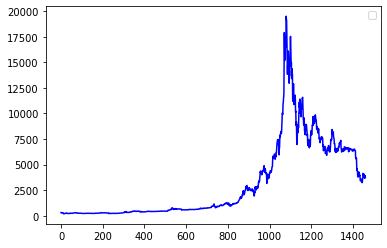

In [ ]:
plt.plot(df['Close'], color='blue')
plt.legend()

In [ ]:
df_test = df.iloc[1390:1397,1:]
df1_test = df.iloc[1390:1397:,1:]
df_test.reset_index(inplace=True)
df_test

,index,Close,Fees_Mean,Fees_Median,Fee_Ratio_Multiple,UTXOs_in_Loss,UTXO_Value_Created_Mean,Blocks_Mined,Block_Size_Mean,Block_Interval_Median,...,Difficulty_Ribbon_ma9,Difficulty_Ribbon_ma90,SOPR,Supply-Adjusted_CDD,Transaction_Rate,Open,High,Low,Adj_Close,Volume
0,1390,6487.160156,0.000065,0.000018,117.021355,20126332.0,1.362630,155.0,9.165396e+05,371.0,...,3.140000e+27,2.900000e+27,9.948899e+09,3.368581e+09,2.953345e+09,6486.049805,6543.799805,6462.979980,6487.160156,3.670000e+09
1,1391,6475.740234,0.000065,0.000019,117.080498,20355764.0,1.595225,154.0,9.322604e+05,352.0,...,3.120000e+27,2.910000e+27,9.947324e+09,3.094716e+09,2.931817e+08,6472.359863,6506.009766,6451.270020,6475.740234,3.720000e+09
2,1392,6495.839844,0.000067,0.000020,84.374214,19574752.0,1.586282,113.0,1.141657e+06,545.0,...,3.110000e+27,2.920000e+26,9.974382e+09,2.209798e+07,2.939560e+09,6478.890137,6521.990234,6468.859863,6495.839844,3.420000e+09
3,1393,6476.290039,0.000069,0.000021,98.634315,20168268.0,1.478821,137.0,1.035430e+06,461.0,...,3.100000e+25,2.930000e+27,9.944833e+09,2.459869e+09,2.945162e+09,6484.649902,6504.649902,6447.029785,6476.290039,3.230000e+09
4,1394,6474.750000,0.000071,0.000020,100.776169,20344060.0,1.249426,143.0,1.058047e+06,458.0,...,3.090000e+27,2.930000e+27,9.844197e+09,5.153509e+09,2.926609e+09,6468.439941,6498.290039,6449.609863,6474.750000,3.310000e+09
5,1395,6480.379883,0.000056,0.000016,130.805481,19917172.0,1.015690,136.0,9.138743e+05,438.0,...,3.090000e+27,2.940000e+27,9.975520e+09,1.304575e+08,2.703854e+09,6480.839844,6507.410156,6453.529785,6480.379883,3.390000e+09
6,1396,6486.390137,0.000075,0.000014,106.971100,19455622.0,0.951946,140.0,8.282876e+05,384.0,...,3.090000e+27,2.950000e+26,9.961886e+09,1.494219e+09,2.543056e+09,6482.660156,6502.279785,6447.910156,6486.390137,3.450000e+09


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train_scaled = sc.fit_transform(df_train)
print(df_train_scaled.shape)
df_train_scaled


In [ ]:
sc2 = StandardScaler()
df_train_scaled_y = sc2.fit_transform(df_train[['Close']])
print(df_train_scaled_y.shape)
df_train_scaled_y

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X = df.drop(['Close'], axis=1)
X = X.drop(['Date'], axis=1)
y = df['Close']
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=30, verbose=5, step=2)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

In [ ]:
rfe_support